# Salut !
This notebook has as objective to explore a multi-level clustering to constraint the problem using an step by step approach.

In [78]:
from cookie_clusters import *

In [79]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import fastdtw as dtw
from scipy.spatial.distance import euclidean
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import Kmeans, DBSCAN, OPTICS, HDBSCAN from sklearn.
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
import pickle

In [80]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

matrice_nir = pd.read_csv('../data/processed/vec_nir.csv').to_numpy()
matrice_rouge = pd.read_csv('../data/processed/vec_red.csv').to_numpy()
matrice_vert = pd.read_csv('../data/processed/vec_green.csv').to_numpy()
matrice_bleu = pd.read_csv('../data/processed/vec_blue.csv').to_numpy()
matrice_ndvi = pd.read_csv('../data/processed/vec_ndvi.csv')
matrice_ndwi = pd.read_csv('../data/processed/vec_ndwi.csv').to_numpy()

In [81]:
def matrice_dtw(X, distance):
  n=len(X)
  r=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
        r[i,j]= dtw.fastdtw(X[i].reshape(1,-1),X[j].reshape(1,-1),dist=distance)[0]
  return r

## 1st step:
Separate the static pixels from those having changes over the time.

The idea ! : Detecting only changes, so centralize the data. From our previus experiences, the better band to detect the majrity of the changes is the NDVI band.

In [82]:
centered_ndvi = matrice_ndvi.apply(lambda x: x-x.mean(), axis = 1).to_numpy()

Axes(0.125,0.11;0.775x0.77)


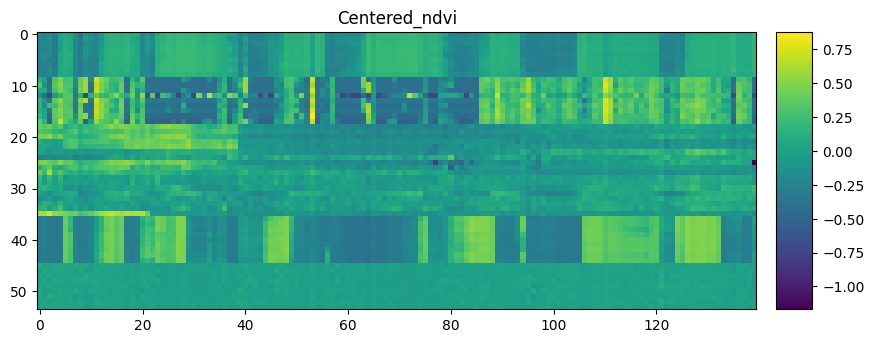

In [83]:
matrice = np.delete(centered_ndvi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Centered_ndvi')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [84]:
from sklearn_extra.cluster import KMedoids

,accuracy,f1_score
0,0.333333,0.222222


,calinski_harabasz_score
0,22.708971


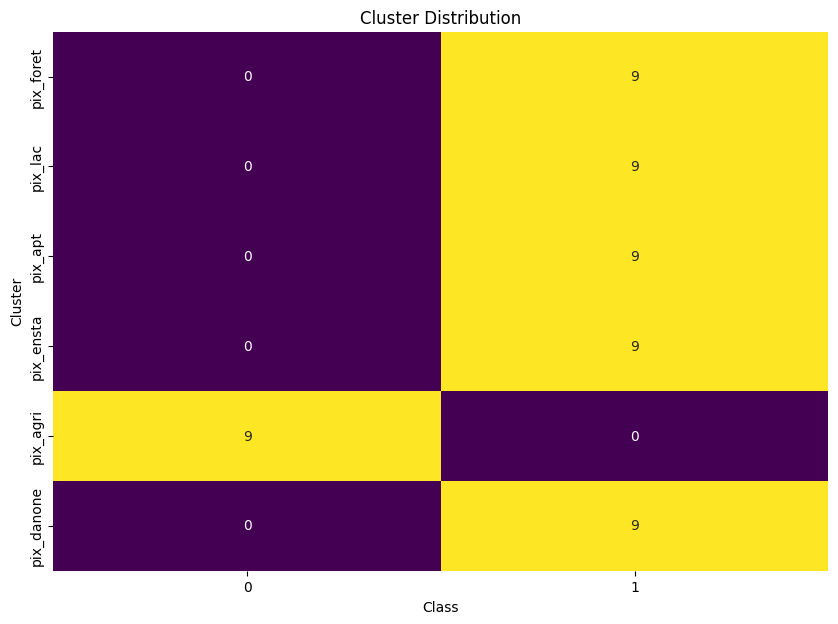

In [85]:
kmed = KMedoids(n_clusters=2, metric='precomputed').fit(matrice_dtw(matrice, euclidean))
yhat = kmed.labels_
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
display(eval.metrics_classif())
display(eval.metrics_clustering())
eval.cluster_distribution()

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
standar_ndvi = scaler.fit_transform(matrice_ndvi)

Axes(0.125,0.11;0.775x0.77)


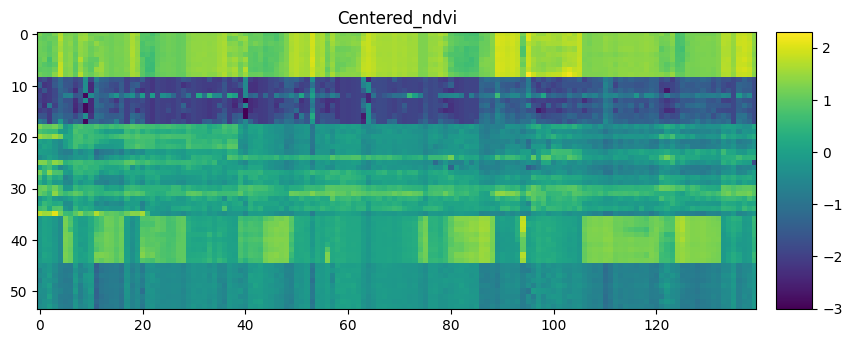

In [88]:
matrice = np.delete(standar_ndvi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Centered_ndvi')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

,calinski_harabasz_score
0,57.462009


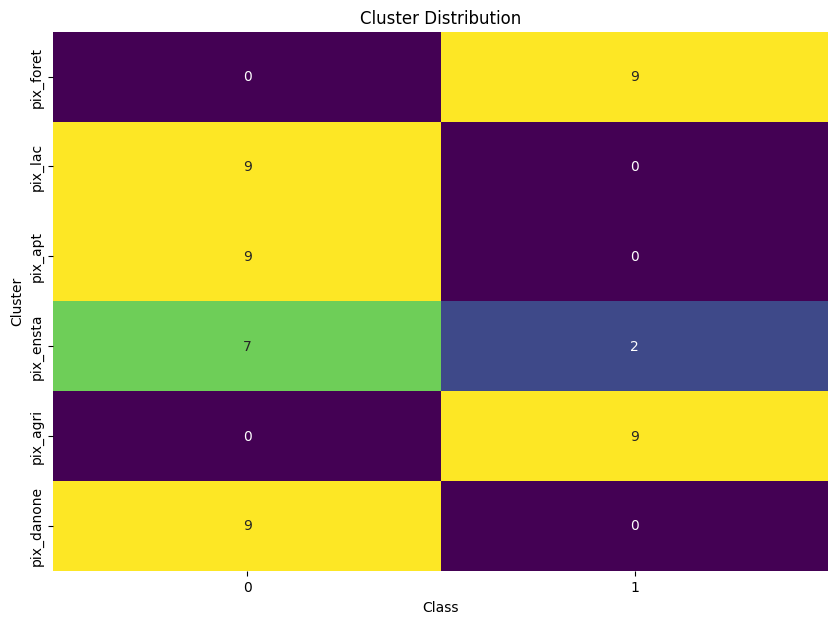

In [89]:
kmed = KMedoids(n_clusters=2, metric='precomputed').fit(matrice_dtw(matrice, euclidean))
yhat = kmed.labels_
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
display(eval.metrics_clustering())
eval.cluster_distribution()

In [90]:
matrice_eau_detection = np.copy(matrice_ndwi)
matrice_eau_detection[matrice_eau_detection<0] = -99

Axes(0.125,0.11;0.775x0.77)


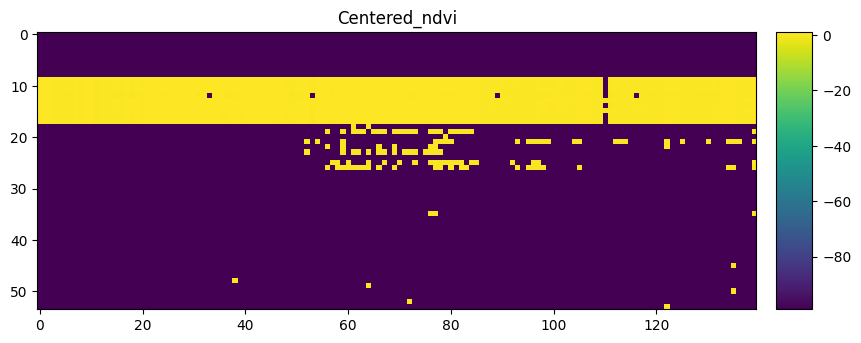

In [93]:
matrice = np.delete(matrice_eau_detection,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Centered_ndvi')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

,calinski_harabasz_score
0,434.004348


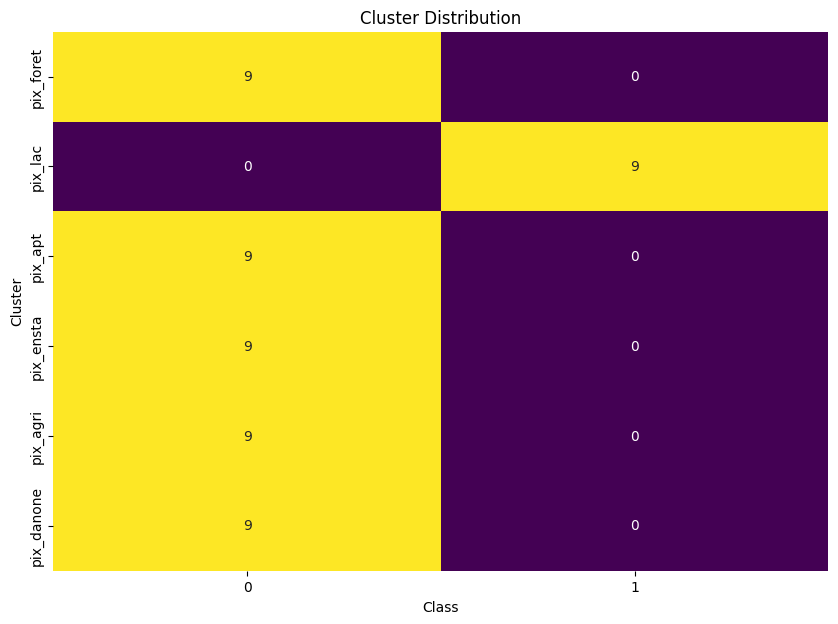

In [112]:
kmed = KMeans(n_clusters=2, n_init='auto').fit(matrice)
yhat = kmed.labels_
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
display(eval.metrics_clustering())
eval.cluster_distribution()

In [115]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [119]:
new_dic = {'no eau': [pix for pix in pixels_de_interet if yhat[pixels_de_interet.index(pix)]==0],
           'eau': [pix for pix in pixels_de_interet if yhat[pixels_de_interet.index(pix)]!=0]}

Working over 'no eau'